# RAJ BHAVESH SHAH
# rajsanchi@gmail.com
# 60004160101

# Predicting Voting Outcomes

## Exploratory_Data_Analysis


In [611]:
# import required libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot stylings
plt.style.use('fivethirtyeight')
%matplotlib inline

# do not display warnings in notebook 
import warnings
warnings.filterwarnings('ignore')

#### Reading Data

In [612]:
# read the input file
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("validation.csv")

In [613]:
# display the first rows in the data
train_data.head()

,USER_ID,YOB,Gender,Income,HouseholdStatus,EducationLevel,Q124742,Q124122,Q123464,Q123621,...,Q99716,Q99581,Q99480,Q98869,Q98578,Q98059,Q98078,Q98197,Q96024,Party
0,1295,1971.0,Female,"$100,001 - $150,000",Married (w/kids),Bachelor's Degree,NaN,Yes,No,No,...,No,No,Yes,No,No,Yes,No,No,Yes,Democrat
1,3324,1981.0,Female,"$25,001 - $50,000",Married (w/kids),Associate's Degree,NaN,NaN,NaN,NaN,...,No,No,Yes,NaN,No,Yes,NaN,Yes,No,Republican
2,6939,1999.0,Female,NaN,Single (no kids),Current K-12,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Democrat
3,1525,1997.0,Male,"$75,000 - $100,000",Single (no kids),Current K-12,NaN,NaN,NaN,NaN,...,No,Yes,No,No,No,Only-child,No,No,Yes,Democrat
4,3341,1977.0,Male,"over $150,000",Married (w/kids),Doctoral Degree,No,No,No,Yes,...,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Democrat


In [614]:
# get the shape of the dataframe
train_data.shape

(4732, 108)

### Null Value treatment

In [615]:
# check for null values
train_data.isnull().sum()

#remove null values
train_data.dropna(axis=0, inplace=True)
test_data.dropna(axis=0, inplace=True)

# check for null values
test_data.isnull().sum()

USER_ID            0
YOB                0
Gender             0
Income             0
HouseholdStatus    0
EducationLevel     0
Q124742            0
Q124122            0
Q123464            0
Q123621            0
Q122769            0
Q122770            0
Q122771            0
Q122120            0
Q121699            0
Q121700            0
Q120978            0
Q121011            0
Q120379            0
Q120650            0
Q120472            0
Q120194            0
Q120012            0
Q120014            0
Q119334            0
Q119851            0
Q119650            0
Q118892            0
Q118117            0
Q118232            0
                  ..
Q106388            0
Q106389            0
Q106042            0
Q105840            0
Q105655            0
Q104996            0
Q103293            0
Q102906            0
Q102674            0
Q102687            0
Q102289            0
Q102089            0
Q101162            0
Q101163            0
Q101596            0
Q100689            0
Q100680      

# Income Plot

In [616]:
data.groupby(['Income','Party'])['Party'].count()

KeyError: 'Income'

KeyError: "['Income' 'Party'] not in index"

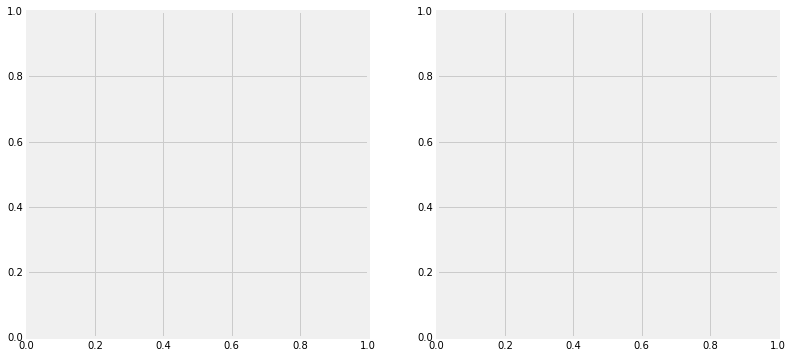

In [617]:
f,ax=plt.subplots(1,2,figsize=(12,6))
data[['Income','Party']].groupby(['Income']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Party vs Income')
sns.countplot('Income',hue='Party',data=data,ax=ax[1])
ax[1].set_title('Income:Republican vs Democrat')
plt.show()

## Feature Engineering

In [618]:
## Mapping Party
train_data['Party'] = train_data['Party'].map( {'Republican': 0, 'Democrat': 1} ).astype(int)
test_data['Party'] = test_data['Party'].map( {'Republican': 0, 'Democrat': 1} ).astype(int)

In [619]:
#One Hot Encoding of the various columns
train_data = pd.get_dummies(train_data)
test_data = pd.get_dummies(test_data)
train_data.head()

,USER_ID,YOB,Party,Gender_Female,Gender_Male,"Income_$100,001 - $150,000","Income_$25,001 - $50,000","Income_$50,000 - $74,999","Income_$75,000 - $100,000","Income_over $150,000",...,Q98578_No,Q98578_Yes,Q98059_Only-child,Q98059_Yes,Q98078_No,Q98078_Yes,Q98197_No,Q98197_Yes,Q96024_No,Q96024_Yes
4,3341,1977.0,1,0,1,0,0,0,0,1,...,1,0,0,1,0,1,1,0,0,1
31,3224,1992.0,1,0,1,0,0,0,0,0,...,1,0,0,1,1,0,1,0,0,1
47,3584,1980.0,0,0,1,1,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
59,5077,1985.0,0,0,1,0,0,0,1,0,...,1,0,0,1,1,0,1,0,0,1
63,520,1972.0,0,1,0,0,0,0,0,0,...,0,1,0,1,1,0,0,1,0,1


In [620]:
#Feature Binning of Age
train_data['CatAge'] = pd.qcut(train_data.YOB, q=4, labels=False )
test_data['CatAge'] = pd.qcut(test_data.YOB, q=4, labels=False )
train_data.head()

,USER_ID,YOB,Party,Gender_Female,Gender_Male,"Income_$100,001 - $150,000","Income_$25,001 - $50,000","Income_$50,000 - $74,999","Income_$75,000 - $100,000","Income_over $150,000",...,Q98578_Yes,Q98059_Only-child,Q98059_Yes,Q98078_No,Q98078_Yes,Q98197_No,Q98197_Yes,Q96024_No,Q96024_Yes,CatAge
4,3341,1977.0,1,0,1,0,0,0,0,1,...,0,0,1,0,1,1,0,0,1,1
31,3224,1992.0,1,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,0,1,3
47,3584,1980.0,0,0,1,1,0,0,0,0,...,0,0,1,1,0,0,1,0,1,1
59,5077,1985.0,0,0,1,0,0,0,1,0,...,0,0,1,1,0,1,0,0,1,2
63,520,1972.0,0,1,0,0,0,0,0,0,...,1,0,1,1,0,0,1,0,1,0


In [621]:
## dropping the original columns as the converted columns are used for training
train_data = train_data.drop(['YOB'], axis=1)
test_data = test_data.drop(['YOB'], axis=1)
train_data.head()

,USER_ID,Party,Gender_Female,Gender_Male,"Income_$100,001 - $150,000","Income_$25,001 - $50,000","Income_$50,000 - $74,999","Income_$75,000 - $100,000","Income_over $150,000","Income_under $25,000",...,Q98578_Yes,Q98059_Only-child,Q98059_Yes,Q98078_No,Q98078_Yes,Q98197_No,Q98197_Yes,Q96024_No,Q96024_Yes,CatAge
4,3341,1,0,1,0,0,0,0,1,0,...,0,0,1,0,1,1,0,0,1,1
31,3224,1,0,1,0,0,0,0,0,1,...,0,0,1,1,0,1,0,0,1,3
47,3584,0,0,1,1,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,1
59,5077,0,0,1,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,2
63,520,0,1,0,0,0,0,0,0,1,...,1,0,1,1,0,0,1,0,1,0


In [622]:
# Removing unnecessary columns
train_data = train_data.drop(['USER_ID'], axis=1)
test_data = test_data.drop(['USER_ID'], axis=1)
btrain=train_data
btest=test_data
train_data.head()

,Party,Gender_Female,Gender_Male,"Income_$100,001 - $150,000","Income_$25,001 - $50,000","Income_$50,000 - $74,999","Income_$75,000 - $100,000","Income_over $150,000","Income_under $25,000",HouseholdStatus_Domestic Partners (no kids),...,Q98578_Yes,Q98059_Only-child,Q98059_Yes,Q98078_No,Q98078_Yes,Q98197_No,Q98197_Yes,Q96024_No,Q96024_Yes,CatAge
4,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,1,0,0,1,1
31,1,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,0,1,3
47,0,0,1,1,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,1
59,0,0,1,0,0,0,1,0,0,0,...,0,0,1,1,0,1,0,0,1,2
63,0,1,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,1,0,1,0


## Algorithm 1:Logistic Regression

In [623]:
# Preparing training data and evaluation data
train_labels = train_data['Party']
train_data = train_data.drop(['Party'], axis=1)
eval_labels = test_data['Party']
eval_data = test_data.drop(['Party'], axis=1)

### **Building the model using Sklearn**

In [624]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(fit_intercept=True)
clf.fit(train_data, train_labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [625]:
print ('Accuracy of the model on train data: {0}'.format(clf.score(train_data, train_labels)))

Accuracy of the model on train data: 0.7318718381112985


In [626]:
print ('Accuracy of the model on eval data: {0}'.format(clf.score(eval_data, eval_labels)))

Accuracy of the model on eval data: 0.6057692307692307


Text(0.5,257.44,'Predicted label')

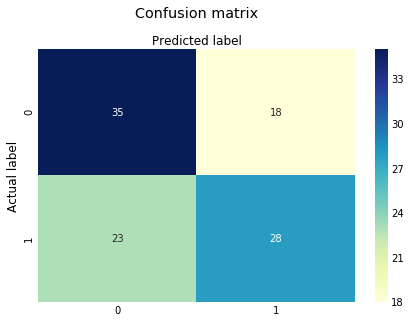

In [627]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
eval_predictions = clf.predict(eval_data)
cm = confusion_matrix(eval_labels, eval_predictions)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ROC Curve

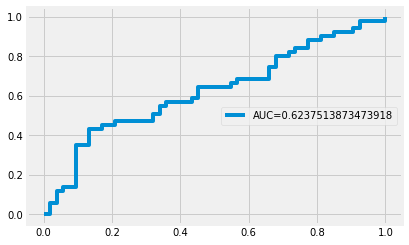

In [628]:
y_pred_proba = clf.predict_proba(eval_data)[::,1]
fpr, tpr, _ = roc_curve(eval_labels, y_pred_proba)
auc = roc_auc_score(eval_labels, y_pred_proba)
plt.plot(fpr, tpr, label="AUC="+str(auc))
plt.legend(loc=5)
plt.show()

## Algorithm2: Decision Tree Classification

## Classifier Building in Scikit-learn

In [629]:
train_data.head()

,Gender_Female,Gender_Male,"Income_$100,001 - $150,000","Income_$25,001 - $50,000","Income_$50,000 - $74,999","Income_$75,000 - $100,000","Income_over $150,000","Income_under $25,000",HouseholdStatus_Domestic Partners (no kids),HouseholdStatus_Domestic Partners (w/kids),...,Q98578_Yes,Q98059_Only-child,Q98059_Yes,Q98078_No,Q98078_Yes,Q98197_No,Q98197_Yes,Q96024_No,Q96024_Yes,CatAge
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,1,0,0,1,1
31,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,3
47,0,1,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,1
59,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,1,2
63,1,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,1,0,1,0


In [630]:
test_data.head()

,Party,Gender_Female,Gender_Male,"Income_$100,001 - $150,000","Income_$25,001 - $50,000","Income_$50,000 - $74,999","Income_$75,000 - $100,000","Income_over $150,000","Income_under $25,000",HouseholdStatus_Domestic Partners (no kids),...,Q98578_Yes,Q98059_Only-child,Q98059_Yes,Q98078_No,Q98078_Yes,Q98197_No,Q98197_Yes,Q96024_No,Q96024_Yes,CatAge
2,1,1,0,0,0,0,0,0,1,0,...,1,0,1,0,1,0,1,1,0,2
21,1,1,0,0,1,0,0,0,0,0,...,0,0,1,1,0,1,0,1,0,2
25,1,0,1,0,0,1,0,0,0,0,...,0,0,1,0,1,1,0,1,0,1
46,1,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,1,0,1,0,3
52,1,0,1,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,1


In [631]:
orig_train = train_data.copy()
orig_test = test_data.copy()

In [632]:
full_data = [train_data, test_data]

### Basic Data Processing(Already done in the Feature Engineering Section)

### Baseline Model
15% of training dataset will be used as validation set.

In [633]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_btrain = btrain['Party']
x_btrain = btrain.drop(['Party'], axis=1).values
x_btest = btest.values

In [634]:
# Create validation dataset out of training data
bval_share = int(0.15*len(y_btrain))

x_bval = x_btrain[-bval_share:]
y_bval = y_btrain[-bval_share:]

x_btrain = x_btrain[:-bval_share]
y_btrain = y_btrain[:-bval_share]

In [635]:
# Create Decision Tree with default parameters
decision_tree = tree.DecisionTreeClassifier()
decision_tree.fit(x_btrain, y_btrain)

acc_decision_tree_train = decision_tree.score(x_btrain, y_btrain) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_bval, y_bval) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

Training Accuracy: 100.000
Validation Accuracy: 47.727


In [636]:
# Predicting for validation dataset
y_bpred = decision_tree.predict(x_bval)

# Confusion Matrix
metrics.confusion_matrix(y_bval, y_bpred)

array([[24, 20],
       [26, 18]], dtype=int64)

### Final Tree

In [637]:
# Create Numpy arrays of train, test and target (Survived) dataframes to feed into our models
y_train = btrain['Party']
x_train = btrain.drop(['Party'], axis=1).values
x_test = btest.drop(['Party'], axis=1).values
y_test=btest['Party']

In [638]:
# Create validation dataset out of training data
val_share = int(0.15*len(y_train))

x_val = x_test[-val_share:]
y_val = y_test[-val_share:]

x_train = x_train[:-val_share]
y_train = y_train[:-val_share]

In [640]:
# Create Decision Tree with max_depth = 3
decision_tree = tree.DecisionTreeClassifier(max_depth=3)
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_val, y_val) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

Training Accuracy: 68.515
Validation Accuracy: 62.500


In [641]:
# Predicting results for test dataset
y_pred = decision_tree.predict(x_test)
print(y_pred)
Predictions = pd.DataFrame({
        "Party": y_pred
    })

[1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 1]


In [642]:
Predictions.head(15)

,Party
0,1
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,0
9,0


In [643]:
## Optimizing Decision Tree Performance

In [644]:
# Create Decision Tree with criterion = entropy
decision_tree = tree.DecisionTreeClassifier(criterion='entropy')
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_val, y_val) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

Training Accuracy: 100.000
Validation Accuracy: 47.727


In [645]:
# Create Decision Tree with splitter = random
decision_tree = tree.DecisionTreeClassifier(splitter='random')
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_val, y_val) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

Training Accuracy: 100.000
Validation Accuracy: 54.545


In [646]:
# Create Decision Tree with max_depth = 4
decision_tree = tree.DecisionTreeClassifier(max_depth=4)
decision_tree.fit(x_train, y_train)

acc_decision_tree_train = decision_tree.score(x_train, y_train) * 100
print("Training Accuracy: %0.3f" % acc_decision_tree_train)

acc_decision_tree_val = decision_tree.score(x_val, y_val) * 100
print("Validation Accuracy: %0.3f" % acc_decision_tree_val)

Training Accuracy: 72.079
Validation Accuracy: 59.091


# Random Forest Algorithm 

## Data Acquisition

In [599]:
train_data.head()

,Gender_Female,Gender_Male,"Income_$100,001 - $150,000","Income_$25,001 - $50,000","Income_$50,000 - $74,999","Income_$75,000 - $100,000","Income_over $150,000","Income_under $25,000",HouseholdStatus_Domestic Partners (no kids),HouseholdStatus_Domestic Partners (w/kids),...,Q98578_Yes,Q98059_Only-child,Q98059_Yes,Q98078_No,Q98078_Yes,Q98197_No,Q98197_Yes,Q96024_No,Q96024_Yes,CatAge
4,0,1,0,0,0,0,1,0,0,0,...,0,0,1,0,1,1,0,0,1,1
31,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,3
47,0,1,1,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,0,1,1
59,0,1,0,0,0,1,0,0,0,0,...,0,0,1,1,0,1,0,0,1,2
63,1,0,0,0,0,0,0,1,0,0,...,1,0,1,1,0,0,1,0,1,0


In [647]:
train_data.info()
test_data.info()
test_data = test_data.drop(['Gender_Male'], axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593 entries, 4 to 4721
Columns: 224 entries, Gender_Female to CatAge
dtypes: int64(1), uint8(223)
memory usage: 138.4 KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 104 entries, 2 to 833
Columns: 225 entries, Party to CatAge
dtypes: int32(1), int64(1), uint8(223)
memory usage: 24.7 KB


## Import RF Classifier and other Evaluation Metrics

In [648]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, recall_score, precision_score

## Establish Baseline

In [649]:
# Declare key parameters of classifier as Iterables

n_estimators = np.arange(3,25,2)
max_depth = np.arange(1,5,1)
criterion = ['gini', 'entropy']
min_samples_split = np.arange(2,6,1)
min_samples_leaf = np.arange(2,6,1)
random_state = [1337]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}

print(random_grid)

{'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]), 'max_depth': array([1, 2, 3, 4]), 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5]), 'min_samples_leaf': array([2, 3, 4, 5]), 'random_state': [1337]}


In [650]:
# Create Base Model for tuning
rf = RandomForestClassifier()

# Instantiate Random Search of Parameters using 3 fold cross validation
rf_random = RandomizedSearchCV(estimator=rf,
                               param_distributions=random_grid, 
                               n_iter=10, 
                               cv=4, 
                               random_state=137)

In [651]:
# Execute training (Fit the random search model)

rf_random.fit(train_data, train_labels) 
print('Done')

Done


In [652]:
# Checkout the best set of Parameters
rf_random.best_params_

{'random_state': 1337,
 'n_estimators': 23,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_depth': 4,
 'criterion': 'entropy'}

In [653]:
# Get the best estimator
best_rf = rf_random.best_estimator_

In [663]:
# Get a list of predictions on test data for evaluation
predictions = list(best_rf.predict(test_data))
test_labels=eval_labels
valid_data=eval_data
print('Accuracy:', best_rf.score(test_data, test_labels))
print('Precision:', precision_score(list(test_labels), predictions))
print('Recall:', recall_score(list(test_labels), predictions))

Accuracy: 0.6346153846153846
Precision: 0.6666666666666666
Recall: 0.5098039215686274


## Try Hyperparameter Optimization using Grid Search

In [664]:
from sklearn.model_selection import GridSearchCV

In [665]:
# Create the parameter grid for Grid Search

param_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth, 
               'criterion': criterion,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'random_state': random_state}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3, 
                           verbose = 1,
                           n_jobs=-1)

In [666]:
# Execute training (Fit the grid search model)
grid_search.fit(train_data, train_labels)

Fitting 3 folds for each of 1408 candidates, totalling 4224 fits


[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 1894 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 4224 out of 4224 | elapsed:   31.5s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_estimators': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23]), 'max_depth': array([1, 2, 3, 4]), 'criterion': ['gini', 'entropy'], 'min_samples_split': array([2, 3, 4, 5]), 'min_samples_leaf': array([2, 3, 4, 5]), 'random_state': [1337]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [667]:
# Checkout the best set of Parameters
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 21,
 'random_state': 1337}

In [670]:
# Get the best estimator
best_gs = grid_search.best_estimator_
valid_labels=eval_labels

In [671]:
# Get a list of predictions on test data and evaluate
predictions = list(best_gs.predict(valid_data))

print('Accuracy:', best_gs.score(valid_data, valid_labels))
print('Precision:', precision_score(list(valid_labels), predictions))
print('Recall:', recall_score(list(valid_labels), predictions))

Accuracy: 0.6346153846153846
Precision: 0.696969696969697
Recall: 0.45098039215686275


# SVC

In [674]:
from sklearn.svm import SVC
clf = SVC(kernel='linear')
clf.fit(train_data, train_labels)

eval_predictions=clf.predict(eval_data)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(eval_labels, eval_predictions))

Accuracy: 0.5865384615384616


In [675]:
from sklearn.metrics import classification_report

print(classification_report(eval_labels,eval_predictions))

             precision    recall  f1-score   support

          0       0.57      0.74      0.64        53
          1       0.61      0.43      0.51        51

avg / total       0.59      0.59      0.58       104



# Conclusion:
# Training Accuracy of Logistic Regression:0.73187
# Testing Accuracy of Logistic Regression:0.73817
# Training Accuracy of Decision Tree:68.515
# Testing Accuracy of Decision Tree:62.500

# After Optimizing, Testing Accuracy of Decision Tree:(Baseline)0.634615
# Testing Accuracy of Random Forest:(After Grid Search) 0.63561
# Accuracy of SVC: 0.586538